In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

<function matplotlib.pyplot.show(*args, **kw)>

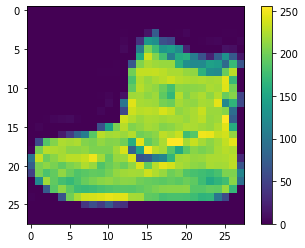

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

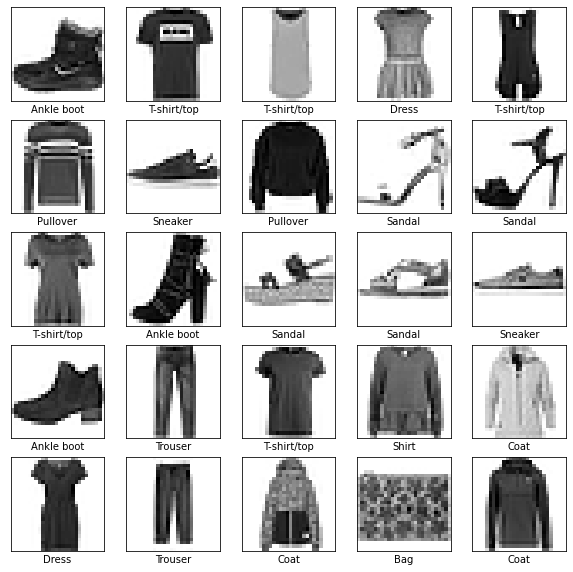

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
### 이거랑 뭐가 다른건지 모르겠다. 같은건가. 아무거나 써도 되나.
# model = keras.models.Sequential()
# model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4985 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3756 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3380 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3141 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2965 - accuracy: 0.8899


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3796 - accuracy: 0.8641

테스트 정확도: 0.8640999794006348


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([2.6198748e-05, 1.1706240e-05, 1.7585343e-06, 2.5975528e-06,
       2.2081376e-06, 4.6913523e-02, 9.9092758e-06, 4.0945339e-01,
       9.6552039e-04, 5.4261321e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
    

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

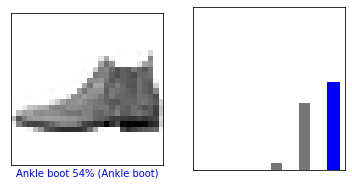

In [21]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

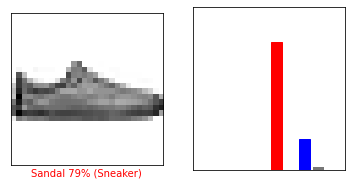

In [22]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

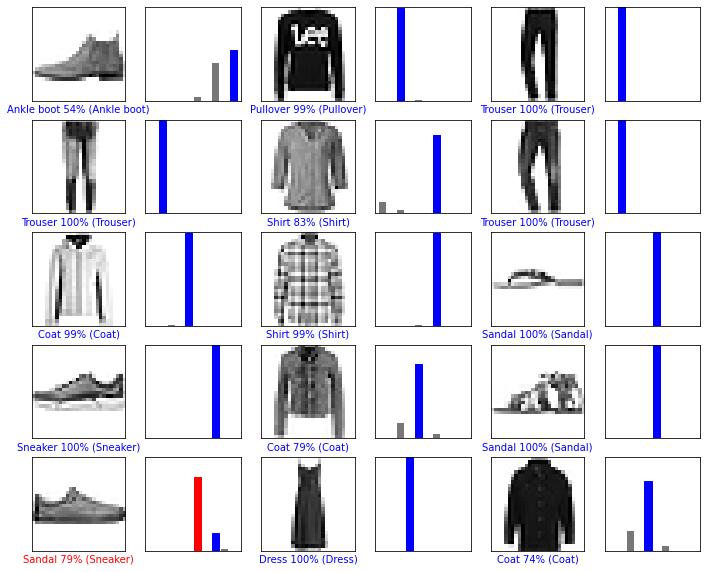

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
i = 107
img = test_images[i]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.3431130e-06 5.4305838e-06 2.9936226e-07 1.8937317e-06 4.4954854e-07
  2.5545436e-01 4.7052475e-07 7.2010040e-01 1.3808013e-02 1.0622388e-02]]


In [27]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

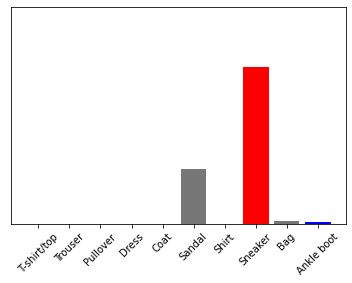

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

True: Ankle boot, Pred: Sneaker


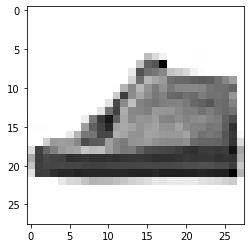

In [29]:
print('True: {}, Pred: {}'.format(class_names[test_labels[i]], class_names[np.argmax(predictions_single)]))
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()